In [1]:
import cv2
import os
import numpy as np
from imutils import paths
import random

In [22]:
images=sorted(list(paths.list_files('pneumonia_detection_dataset/train/')))
images.pop(0)
images

['pneumonia_detection_dataset/train/normal/IM-0115-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0117-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0119-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0122-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0125-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0127-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0128-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0129-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0131-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0133-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0135-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0137-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0140-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0141-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0143-0001.jpeg',
 'pneumonia_detection_dataset/train/normal/IM-0145-0001

In [23]:
images[1]

'pneumonia_detection_dataset/train/normal/IM-0117-0001.jpeg'

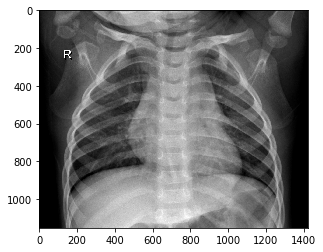

(1152, 1422, 3)

In [24]:
import matplotlib.pyplot as plt
target_image=images[1]
target_image=cv2.imread(images[1])
plt.imshow(target_image)
plt.show()
target_image.shape

In [26]:
shape0=[]
shape1=[]

for i in images:
    targetimage=cv2.imread(i)
    shape0.append(targetimage.shape[0])
    shape1.append(targetimage.shape[1])

In [27]:
print(min(shape0),min(shape1))
print(max(shape0),max(shape1))

127 384
2663 2916


In [28]:
labels=[]
data=[]

random.seed(20)
random.shuffle(images)

for i in images:
    targetimage=cv2.imread(i)
    targetimage=cv2.resize(targetimage,(300,300)).flatten()
    data.append(targetimage)
    labels.append(i.split('/')[2])

In [29]:
print(data[3100])
print(labels[3100])

[0 0 0 ... 0 0 0]
normal


In [30]:
data=np.array(data)
labels=np.array(labels)

In [31]:
data=np.array(data,dtype='float')/255.0

In [32]:
data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27843137, 0.27843137, 0.27843137, ..., 0.14901961, 0.14901961,
        0.14901961],
       [0.08235294, 0.08235294, 0.08235294, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02352941, 0.02352941, 0.02352941, ..., 0.89803922, 0.89803922,
        0.89803922],
       [0.79607843, 0.79607843, 0.79607843, ..., 0.09019608, 0.09019608,
        0.09019608],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
labels

array(['normal', 'opacity', 'normal', ..., 'opacity', 'opacity', 'normal'],
      dtype='<U7')

In [34]:
from sklearn.model_selection import train_test_split
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.20)

In [35]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.fit_transform(testY)

In [38]:
trainY[1]

array([1])

In [53]:
from keras.preprocessing.image import ImageDataGenerator

training_generator=ImageDataGenerator(rescale=1./255,validation_split=.25)

In [54]:
type(training_generator)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [58]:
training=training_generator.flow_from_directory('pneumonia_detection_dataset/train/',target_size=(300,300),
                                                batch_size=15,class_mode='categorical',subset='training')
training.class_indices

Found 3925 images belonging to 2 classes.


{'normal': 0, 'opacity': 1}

In [59]:
validation=training_generator.flow_from_directory('pneumonia_detection_dataset/train/',target_size=(300,300),
                                                 batch_size=15,class_mode='categorical',subset='validation')
validation.class_indices

Found 1307 images belonging to 2 classes.


{'normal': 0, 'opacity': 1}

In [57]:
testing=training_generator.flow_from_directory('pneumonia_detection_dataset/test',target_size=(300,300),
                                               batch_size=15,class_mode='categorical')
testing.class_indices

Found 624 images belonging to 2 classes.


{'normal': 0, 'opacity': 1}

In [60]:
import tensorflow as tf

In [67]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),input_shape=(300,300,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Dropout(0.15),
                                  #Second Convolution Layer
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                  #Third Convolution Layer
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                  #Fourth Convolution Layer
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.08),
                                  #Fifth Convolution Layer
                                  tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.06),
                                  #Flattening Layer
                                  tf.keras.layers.Flatten(),
                                  # Dense 1
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  # Dense 2
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  # Dense 3
                                  tf.keras.layers.Dense(256,activation='relu'),
                                  #Dense4/Output Layer
                                  tf.keras.layers.Dense(2,activation='softmax')
                                  
                                  ])

In [68]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [69]:
history=model.fit(training,validation_data=validation,epochs=20)

Epoch 1/20
262/262 [==============================] - 175s 664ms/step - loss: 0.6796 - acc: 0.7348 - val_loss: 0.3836 - val_acc: 0.8493
Epoch 2/20
262/262 [==============================] - 179s 683ms/step - loss: 0.2456 - acc: 0.9047 - val_loss: 0.2693 - val_acc: 0.9028
Epoch 3/20
262/262 [==============================] - 176s 669ms/step - loss: 0.1370 - acc: 0.9460 - val_loss: 0.2586 - val_acc: 0.8875
Epoch 4/20
262/262 [==============================] - 173s 659ms/step - loss: 0.1295 - acc: 0.9505 - val_loss: 0.2296 - val_acc: 0.9419
Epoch 5/20
262/262 [==============================] - 179s 681ms/step - loss: 0.1326 - acc: 0.9537 - val_loss: 0.1238 - val_acc: 0.9633
Epoch 6/20
262/262 [==============================] - 186s 710ms/step - loss: 0.0858 - acc: 0.9699 - val_loss: 0.1903 - val_acc: 0.9166
Epoch 7/20
262/262 [==============================] - 185s 706ms/step - loss: 0.0766 - acc: 0.9746 - val_loss: 0.1942 - val_acc: 0.9380
Epoch 8/20
262/262 [============================